# 군집화(Clustering 기법)


- 중요성: 데이터 속성을 파악하고, 데이터가 어떻게 구성되어있는지 분석하는 데 있어서 중요합니다.


- 적용: 비교사 방식 인공지능에 사용하며 시각화 기법에 활용할 수 있습니다. 설문지를 작성한 사용자를 기준을 정해 군집화하거나, 뉴스를 군집화할 때 적용할 수 있습니다.


- 같은 cluster에서는 유사도가 커지도록, cluster와 cluster는 유사도가 작아지도록 설계


1. Partitional Clustering


- Data object는 하나의 subset만 존재 
ex) K-Means, Density-based clustering


2. Hierarchical Clustering


- Clustering 계층화

# K-Means

- 그룹의 개수 k를 지정
- 각 cluster의 가운데를 표현하는 가상의 값 centroid를 이용


- 모든 점에 대한 가장 가까운 cluster 그룹화
- 그룹화한 값들의 평균으로 centroid 재설정



1. 임의의 중심위치  μk(k=1,…,K) 를 고른다. 보통 데이터 표본 중에서  K 개를 선택합니다.
2. 모든 데이터  xi(i=1,…,N) 에서 각각의 중심위치  μk 까지의 거리를 계산합니다.
3. 각 데이터에서 가장 가까운 중심위치를 선택하여 각 데이터가 속하는 군집을 정합니다.
4. 각 군집에 대해 중심위치  μk 를 다시 계산합니다.
5. 2 ~ 4를 반복합니다.

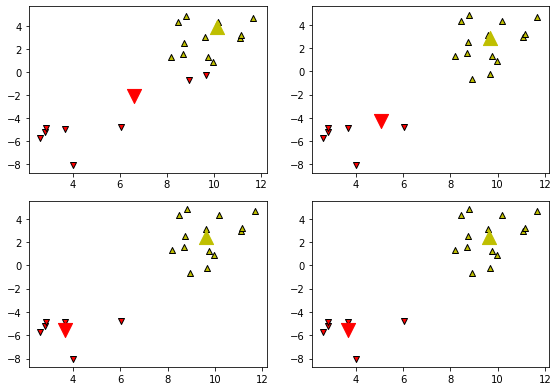

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

K-Means의 한계

- Size 정확히 기입 필요
- 밀집도 차이에 따른 오류 발생 가능
- 구형의 군집이 아니라면 오류 발생 가능
- Outlier에 취약

# Hierarchical Clustering

K를 지정할 필요없이 계층화된 군집 트리를 생성

1. 유사도 행렬 생성
2. 두 cluster 합병
3. 유사도 행렬 갱신
4. 2, 3 반복

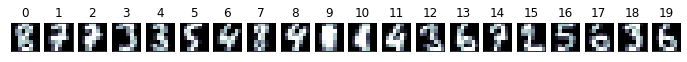

In [2]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
n_image = 20
np.random.seed(0)
idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]

plt.figure(figsize=(12, 1))
for i in range(n_image):
    plt.subplot(1, n_image, i + 1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')
Z

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

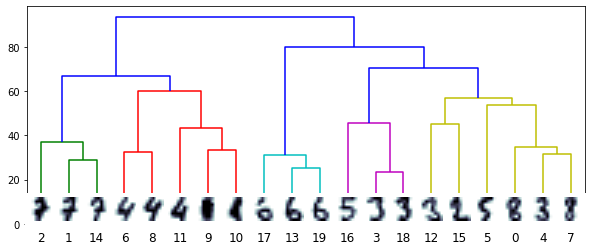

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation="bilinear", zoom=3)
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.show()

트리에서 원하는 cluster의 개수만큼 위에서 잘라서 사용 가능하다.

MIN방식 Hierarchical Clustering

- 촘촘히 뭉쳐있을 때 Clustering 성능 우수
- noise에 민감

MAX방식 Hierarchical Clustering

- noise에 덜 민감

Group Average방식 Hierarchical Clustering

- 둥근 모양으로 나옴


Hierarchical Clustering 제한사항

- 한 번 그룹핑되면 바뀌지 않음

# DBScan

density-based 알고리즘

1. Core Point - 골격을 이루는 Point
2. Boarder Point - cluster의 경계에 있을만한 Point
3. Noise Point - Core Point도 아니고 Boarder Point도 아닌 Point


- Eps: Point에서 계산할 반경
- MinPts: 반경안에 Core Point가 되기 위해 최소한으로 있어야 하는 Point의 개수

1. 모든 점 Point 구분
2. Noise Point 제거
3. Core Point들 사이 간선 생성
4. Core Point 군집화

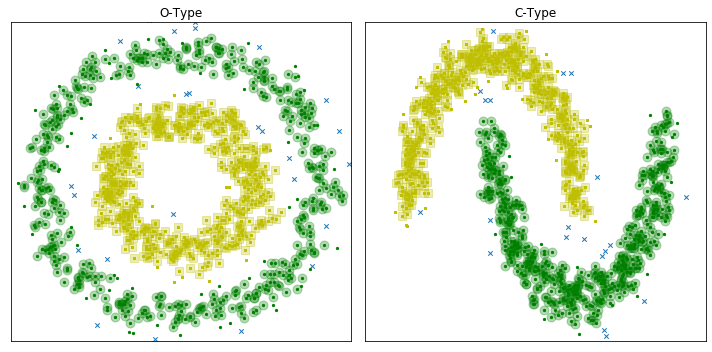

In [5]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("O-Type", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("C-Type", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()